Loan Default Prediction

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load Dataset
df = pd.read_csv('loan_data.csv')

In [4]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [5]:
df.info() # Get data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


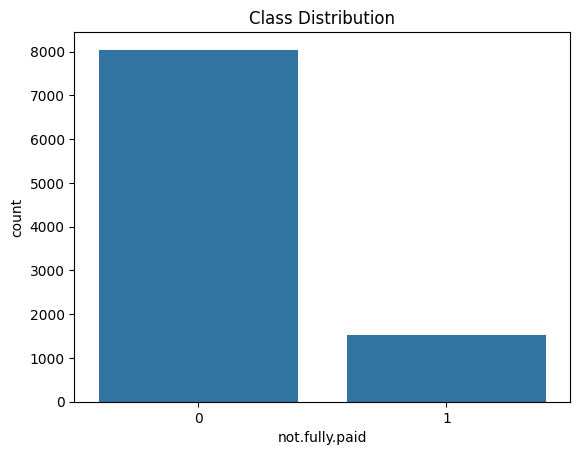

In [7]:

# Visualizing Class Imbalance
sns.countplot(x='not.fully.paid', data=df)
plt.title("Class Distribution")
plt.show()

In [8]:
print("Missing Values:")
print(df.isnull().sum())

# Checking for Duplicates
print(f"Duplicate Rows: {df.duplicated().sum()}")

Missing Values:
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64
Duplicate Rows: 0


Preprocess the data, handling missing values and class imbalance using techniques like SMOTE.

In [9]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2025-02-09 17:41:30.029801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Load Data (Assuming 'loan_data.csv' is the file)
data= df.copy()


In [11]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
purpose_encoded = encoder.fit_transform(df[['purpose']])
purpose_df = pd.DataFrame(purpose_encoded, columns=encoder.get_feature_names_out(['purpose']))

# Drop original 'purpose' column and concatenate encoded data
df = df.drop(columns=['purpose'])
df = pd.concat([df, purpose_df], axis=1)

# Encoding Boolean Features
boolean_features = ['credit.policy', 'not.fully.paid']
label_encoder = LabelEncoder()
for col in boolean_features:
    df[col] = label_encoder.fit_transform(df[col])


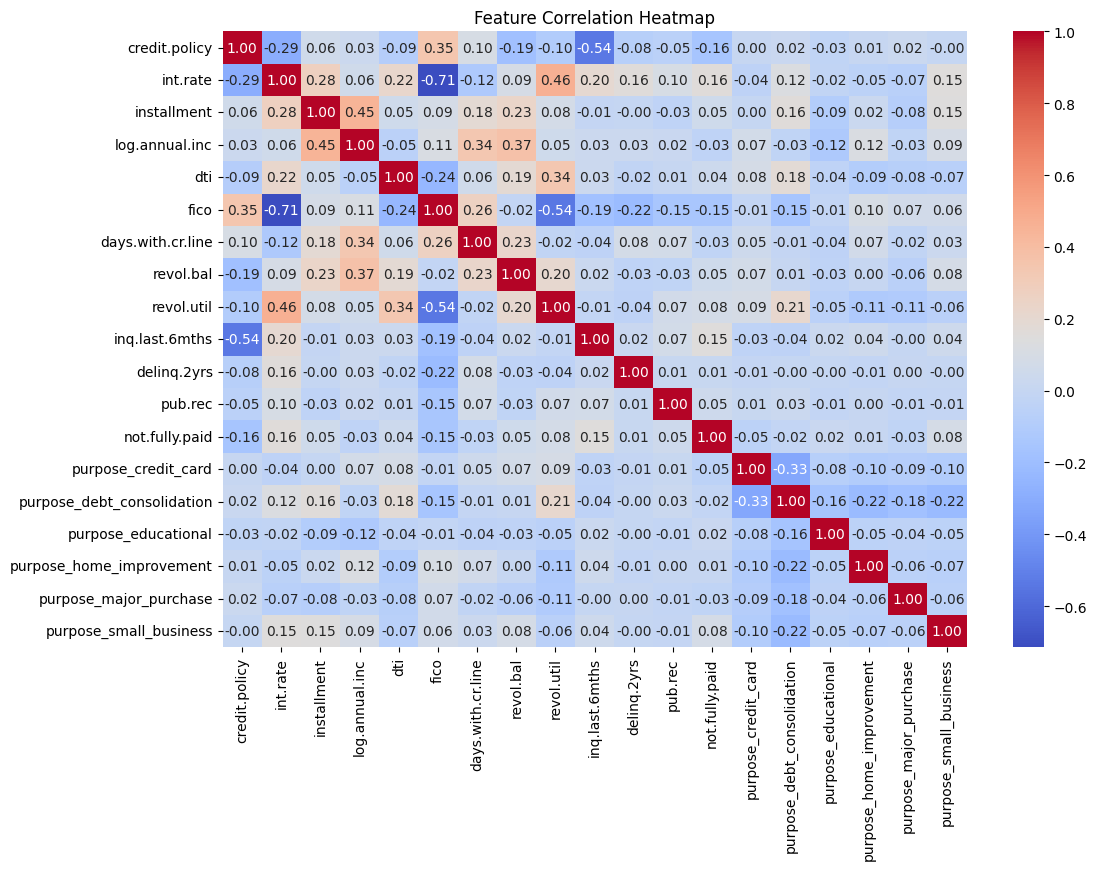

In [12]:
# Encoding Boolean Features
boolean_features = ['credit.policy', 'not.fully.paid']
label_encoder = LabelEncoder()
for col in boolean_features:
    df[col] = label_encoder.fit_transform(df[col])

# Checking Correlation Heatmap to Identify Significant Features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
# Encoding 'purpose' column in the 'data' DataFrame
purpose_encoded_data = encoder.transform(data[['purpose']])
purpose_df_data = pd.DataFrame(purpose_encoded_data, columns=encoder.get_feature_names_out(['purpose']))

# Drop original 'purpose' column and concatenate encoded data
data = data.drop(columns=['purpose'])
data = pd.concat([data, purpose_df_data], axis=1)

correlations = data.corr()["not.fully.paid"].sort_values(key=abs, ascending=False)
print("Feature Correlations with Target Variable:")
print(correlations)

Feature Correlations with Target Variable:
not.fully.paid                1.000000
int.rate                      0.159552
credit.policy                -0.158119
fico                         -0.149666
inq.last.6mths                0.149452
purpose_small_business        0.084460
revol.util                    0.082088
revol.bal                     0.053699
installment                   0.049955
pub.rec                       0.048634
purpose_credit_card          -0.047136
dti                           0.037362
log.annual.inc               -0.033439
days.with.cr.line            -0.029237
purpose_major_purchase       -0.028580
purpose_educational           0.021609
purpose_debt_consolidation   -0.017543
delinq.2yrs                   0.008881
purpose_home_improvement      0.007272
Name: not.fully.paid, dtype: float64


In [14]:
# Splitting Data
X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

# Checking Class Imbalance
print("Class Distribution:")

Class Distribution:


In [15]:
if y.value_counts(normalize=True).min() < 0.4:  # Example threshold for imbalance
    smote = SMOTE(random_state=42)
    X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_scaled = scaler.fit_transform(X)

In [17]:
# Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Preprocessing completed successfully!")


Preprocessing completed successfully!


Train classifiers such SVM.

In [23]:

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)


Evaluate performance using metrics such as Precision, Recall, and F1 Score

In [24]:
print("SVM Performance:")
print(classification_report(y_test, svm_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_preds))


SVM Performance:
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1614
           1       0.86      0.71      0.78      1604

    accuracy                           0.80      3218
   macro avg       0.81      0.80      0.80      3218
weighted avg       0.81      0.80      0.80      3218

Confusion Matrix:
 [[1422  192]
 [ 461 1143]]


Generate a comprehensive performance report and recommendations for lenders.

In [25]:
def generate_report(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }

report = [
    generate_report("SVM", y_test, svm_preds)
]
report_df = pd.DataFrame(report)
report_df.to_csv('performance_report.csv', index=False)
print("Performance report saved as performance_report.csv")

Performance report saved as performance_report.csv


Performance report saved as performance_report.csv


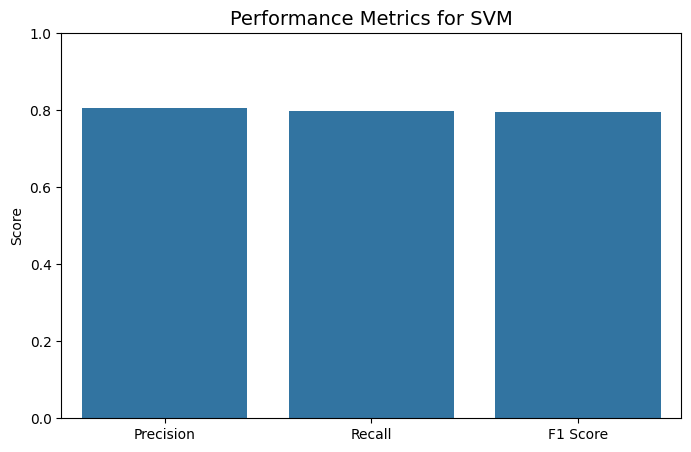

In [28]:
def generate_report(model_name, y_true, y_pred):
    return {
        "Model": model_name,
        "Precision": precision_score(y_true, y_pred, average='weighted'),
        "Recall": recall_score(y_true, y_pred, average='weighted'),
        "F1 Score": f1_score(y_true, y_pred, average='weighted')
    }

# Generate report
report = [
    generate_report("SVM", y_test, svm_preds)
]

# Convert to DataFrame
report_df = pd.DataFrame(report)

# Save report as CSV
report_df.to_csv('performance_report.csv', index=False)
print("Performance report saved as performance_report.csv")

# 📊 **Visualization**
plt.figure(figsize=(8, 5))
sns.barplot(x=['Precision', 'Recall', 'F1 Score'], y=report_df.iloc[0, 1:])  # Extract metrics
plt.title(f"Performance Metrics for {report_df.iloc[0, 0]}", fontsize=14)
plt.ylabel("Score")
plt.ylim(0, 1)  # Metrics range between 0 and 1
plt.show()
